# ЗАДАНИЕ

Необходимо создать, обучить нейронную сеть и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания цифр из MNIST
* сохраните веса (модель)
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


# ..

In [ ]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist 

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta 

# Используем дял to_categoricall
from tensorflow.keras import utils 

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# Для загрузки своей картинки
from google.colab import files 

# Библиотека работы с массивами
import numpy as np 

# Для отрисовки графиков
import matplotlib.pyplot as plt 

# Для отрисовки изображений
from PIL import Image 

# Для генерации случайных чисел 
import random 

# Для округления
import math 

#Для работы с файлами 
import os 

# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
import gdown

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l6/0-9.zip', None, quiet=True)

'0-9.zip'

## Распознавание изображений из набора данных MNIST 


**Подготовка данных**


In [ ]:
# Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

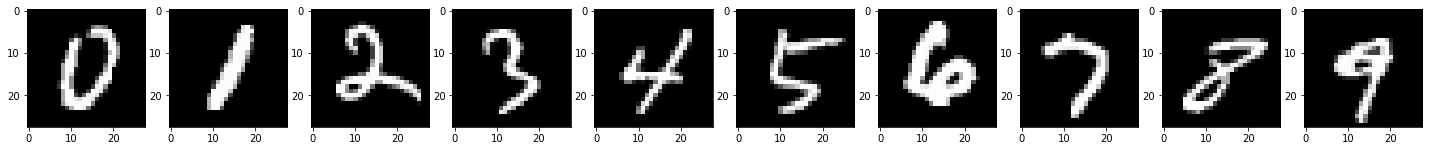

In [ ]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() # Показываем изображения

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы свёрточная сеть понимала, что это чёрно-белые данные

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Посмотрим форматы выборок перед обучением

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [ ]:
# задаём batch_size
batch_size = 128 

# Создаем последовательную модель

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1))) # Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) # Первый слой подвыборки

model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Flatten())

model.add(Dense(256, activation='relu')) # Полносвязный слой для классификации
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

Epoch 1/15
469/469 [==============================] - 18s 16ms/step - loss: 0.1542 - accuracy: 0.9526 - val_loss: 0.0405 - val_accuracy: 0.9870
Epoch 2/15
469/469 [==============================] - 7s 16ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0347 - val_accuracy: 0.9884
Epoch 3/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0357 - accuracy: 0.9887 - val_loss: 0.0309 - val_accuracy: 0.9906
Epoch 4/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0275 - accuracy: 0.9913 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch 5/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0313 - val_accuracy: 0.9901
Epoch 6/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0295 - val_accuracy: 0.9913
Epoch 7/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0297 - val_accuracy: 0.991

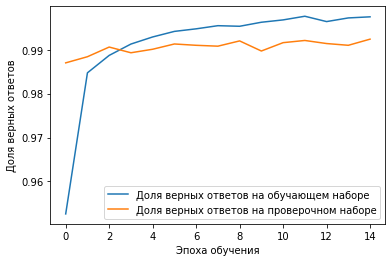

In [ ]:
# Обучаем сеть на данных mnist

history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

..

# **💠 РЕШЕНИЕ**

## **1. Подготовительные шаги**

##### *📍проверка используемых устройств*

In [18]:
#@title 🔬выделенной Google Colab видеокарты:
#import tensorflow as tf
#print('\n', tf.test.gpu_device_name(), '\n')
#!nvidia-smi -L
#!nvidia-smi -L
!pip install -q keras

In [3]:
!pip install numpy pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 18.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 20.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 21.3 MB/s eta 0:00:00a 0:00:01


### ***💾 Загрузка необходимых библиотек***

In [4]:
#@title ▪️ 1.Необходимые инструменты для работы в Colab
import numpy as np                                         # Подключение библиотеки для работы с массивами
import pandas as pd                                        # Подключение библиотеки для работы с DataFrame (архив итогов)
import matplotlib.pyplot as plt                            # Подключение библиотек для отрисовки изображений и графиков
#import matplotlib.image as mpimg                          # Библиотека для загрузки и отображения Matplotlib RGB Image
#import gdown                                              # Библиотека для загрузки файлов из облачного хранилища (Яндекс)
import os                                                  # Подключение модуля для работы с файлами
import random                                              # Библиотека для работы со случайными величинами
#from google.colab import files                             # Библиотека для связи с google-диском (загрузки своих файлов)
#from google.colab import output                            # Библиотека для очистки экрана ноутбука
import time                                                # Библиотека для измерения времени работы цикла
# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline
print(*time.localtime()[0:3], sep='-')
print('✅ Дополнительный инструменты (numpy, pandas, plt ..)')

2023-2-4
✅ Дополнительный инструменты (numpy, pandas, plt ..)


In [5]:
!pip install numpy scipy scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 28.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 27.3 MB/s eta 0:00:00


In [7]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.1 MB/s eta 0:00:0000:0100:07
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.2 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [21]:
!pip install tensorflow

In [22]:
#@title ▪️ 2.Библиотеки TensorFlow и Keras
from tensorflow.keras.models import Sequential             # Подключение класса для создания последовательной модели НС прямого распространения
from tensorflow.keras.layers import Dense                  # Линейный (полносвязный) слой отвечает за соединение нейронов из предыдущего и следующего слоя
from tensorflow.keras.layers import Activation             # Слой активации, который применяет некоторую (обычно) несложную функцию к каждой точке входного тензора
from tensorflow.keras.layers import Dropout                # Слой регуляризации, обнуляющий в модели НС часть весов
from tensorflow.keras.layers import BatchNormalization     # Слой нормализации, обеспечивающий пакетную (batch) нормализацию
from tensorflow.keras.layers import Conv2D                 # Сверточный 2D-слой (для изображений, как правило)
from tensorflow.keras.layers import SpatialDropout2D       # Слой регуляризации для CNN
from tensorflow.keras.layers import MaxPooling2D           # Слой масштабирования - слой подвыборки, снижающий размерность поступивших на него данных
from tensorflow.keras.layers import Flatten                # Слой, преобразующий 2D-данные в 1D-данные
from tensorflow.keras.optimizers import Adam               # Подключение оптимизатора [Adam][Adadelta]
from tensorflow.keras import utils                         # Подключение утилит для подготовки данных (to_categorical)
from tensorflow.keras.preprocessing import image           # Подключение библиотеки для загрузки изображений
from tensorflow.keras.preprocessing.image import load_img  # Метод для загрузки изображений

from tensorflow.keras.datasets import mnist                # Библиотека с базой Mnist (набор данных рукописных цифр)
#from sklearn.datasets import load_wine                    # Библиотека с базой вин
#from keras.datasets import fashion_mnist                  # Библиотека с базой Fashion_Mnist (для загрузки датасета)
from sklearn.model_selection import train_test_split       # Библиотека для разделения данных на выборки
#from sklearn.model_selection import RandomizedSearchCV    # Библиотека для оптимизации гиперпараметров с помощью случайного поиска
from sklearn import preprocessing                          # Предварительная обработка данных
#from sklearn.metrics import accuracy_score
print(*time.localtime()[0:3], sep='-')
print('✅ Библиотеки TensorFlow и Keras')

2023-2-4
✅ Библиотеки TensorFlow и Keras


In [33]:
#@title ▪️ 3.Доп. функции [send_message][set_table][set_font1][frame_height][frame_norm]
# (для отправки сообщений, вывода таблиц, установки формата шрифтов)

# Функция отправки сообщений из Google Colab в Telegram
import json
import requests

file = 'env.json'
with open(file) as f: # загрузка файла
  data = json.load(f)
token, my_id = data.values()

def send_message(message, parse_mode='Markdown', chat_id=my_id, token=token):
    """ пример использования:
message = f'Отправка сообщения из Colab: <b>[{my_id}]</b>'
response = send_message(message, 'HTML') 
print(response)
    """
    print('\n', message)
    url = f'https://api.telegram.org/bot{token}/sendMessage'
    data = {'chat_id': chat_id, 'text': message, 'parse_mode': parse_mode}
    response = requests.post(url, json=data)
    return json.loads(response.text)

def send_photo(img, chat_id=my_id, token=token):
    url = 'https://api.telegram.org/bot'
    files = {'photo': open(img, 'rb')}
    requests.post(f'{url}{token}/sendPhoto?chat_id={chat_id}', files=files)


# Разовое изменение шрифта
from IPython.display import Javascript
def set_font1():
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '16px'
      break
    }
  }
  '''))


# Разовое сокращение 
# from IPython.display import Javascript
def frame_height():
    display(Javascript('''
    google.colab.output.setIframeHeight(0, true, {maxHeight: 450})
    '''))


# Разовый перенос строки в видмой области окна (без бара)
from IPython.display import HTML
def frame_norm():
    display(HTML('''
    <style>
        pre {
            white-space: normal;
        }
    </style>
    '''))


# Функция для вывода таблицы Pandas рядом в ряд
from IPython.display import display_html
def set_table(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

print(*time.localtime()[0:3], sep='-')
print('✅ Дополнительные функции')

2023-2-4
✅ Дополнительные функции


In [34]:
send_photo('val_loss.png')

### ***💾 Загрузка датасета из облака и распаковка архива***

In [10]:
#@title Функция вывода изображений для проверки
#img_size = (128, 64)                # устанавливаем рабочий размер картинок для работы НС
img_size = (28, 28)

# Проверка целостности и базовой размерности загруженных файлов
def check_images(nums, *args): # Подаем число столбцов и папки по количеству классов
    nums = (lambda x: 4 if x < 4 else 12 if x > 12 else x)(nums) # нормирование количества столбцов [4:12]
    rows = len(args)
    box_width = int(round(2.5 * nums, 0))
    box_height = int(round(box_width / 6 * rows, 0))
    pic_box = plt.figure(figsize=(box_width,box_height))              # формируем фигуру размером 22 на 10 дюймов
    for h in range(rows):
        path = args[h]
        for w in range(nums):                          # выбираем 3 ряда случайных индексов для отображения картинок
            pic_box.add_subplot(rows, nums, h * nums + w + 1)    # добавляем ячейку в фигуру pix_box для вывода текущего изображения
            if w == 0:
                plt.ylabel(path[9:], fontsize=2*nums)
            file = random.choice(os.listdir(path))
            img = load_img(path+file, target_size=img_size, color_mode="grayscale")
            plt.imshow(img, cmap = 'gray')                # вывод картинок с подписью метки
            plt.axis('on')                               # отключаем отображение осей
            plt.title(file, fontsize=2*nums-2)    # вывод метки класса для N-го изображения
    plt.show()                                        # выводим все созданные фигуры на экран

print(*time.localtime()[0:3], sep='-')
print('✅ Функция вывода изображений')

2023-2-4
✅ Функция вывода изображений


In [11]:
# Загрузка данных Mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # изображения и метки для обучения и тестирования НС

11490434/11490434 [==============================] - 1s 0us/step


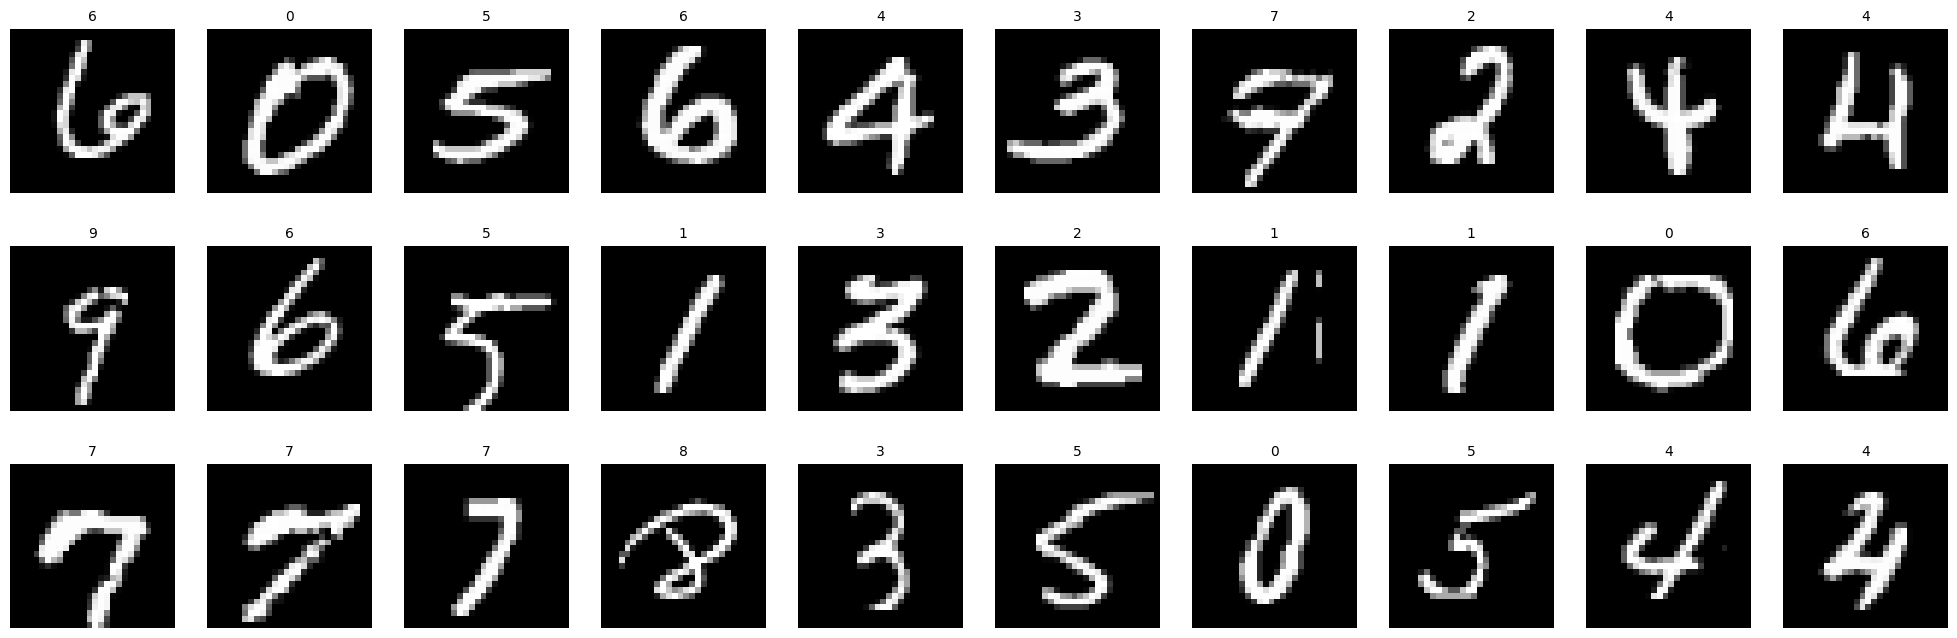

In [12]:
# Проверка ряда случайных изображений из закаченных объектов (картинок и меток классов к ним)
img_h = x_train.shape[1]
img_w = x_train.shape[2]
pic_box = plt.figure(figsize=(25,8))             # формируем фигуру размером 22 на 10 дюймов

for i in range(30):                              # выбираем 3 ряда случайных индексов для отображения картинок
  N = np.random.randint(0, y_train.shape[0])        # .. случайное число от 0 до 6000 - значения размерности выборки
  pic_box.add_subplot(3, 10, i+1)                # добавляем ячейку в фигуру pix_box для вывода текущего изображения
  plt.imshow(np.reshape(x_train[N], (img_h,img_w)), cmap = 'gray') # вывод случайных картинок с подписью метки
  plt.axis('off')                                # отключаем отображение осей
  plt.title(str(y_train[N]), fontsize=10)        # вывод метки класса для N-го изображения

plt.show()                                       # выводим все созданные фигуры на экран

### 🔬 Проверка формы данных

In [13]:
#@title ⚙️ Подготовка исходных данных
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
set_font1()
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print('x_train:', x_train.shape)
print('x_test:', x_test.shape)
print()
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

<IPython.core.display.Javascript object>

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


In [14]:
#@title Объявление переменных и констант
#class_count = y_train.shape[1]  # Количество выходных классов = 3
class_count = (lambda x: 1 if len(x) == 1 else x[1])(y_train.shape)
i_dim = x_train.shape[1]        # input_dim=24576
v_split = 0.2                  # доля проверочной выборки (10000 из 50000) = 20% [validation_split=v_split]
my_models = []                  # Создание списка моделей
verb = 1                        # verbose=0 - не показывать ход обучения, 1 - показывать 
#act_func = ['relu', 'sigmoid', 'tanh', 'elu'] # Функции активации
#drop_out = [0.1, 0.2, 0.3, 0.4] # Доля отключаемых нейронов в слоях Dropout
#neur_num = [1024, 512, 256]      # Количество нейронов полносвязного слоя Dense
out_func = (lambda x: 'sigmoid' if x == 1 else 'softmax')(class_count)
cross_loss = (lambda x: 'binary_crossentropy' if x == 1 else 'categorical_crossentropy')(class_count) # 'sparse_categorical_crossentropy'

img_h = img_size[0]
img_w = img_size[1]
n_col = x_train.shape[-1]
i_shape = (img_h, img_w, n_col)

print(*time.localtime()[0:3], sep='-')
print('✅ Функция графиков точности и ошибок НС')
print('\n', 'i_shape:', i_shape)

2023-2-4
✅ Функция графиков точности и ошибок НС

 i_shape: (28, 28, 1)


In [35]:
#@title Функция графиков точности и ошибок НС 
#       на обучающей и проверочной выборках
def plot_history(history):
    print('\n)')
    pic_box = plt.figure(figsize=(17,5))                                                         # формируем фигуру размером 12 на 8 дюймов
    # ------- Доля верных ответов ---------//
    pic_box.add_subplot(1, 2, 1)                                                                 # добавляем 1 ячейку в фигуру pix_box (в ряд)
    plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')       # Отрисовка графика точности на обучающей выборке
    plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе') # Отрисовка графика точности на проверочной выборке
    plt.xlabel('Эпоха обучения')                                                                 # Отрисовка подписей осей
    plt.ylabel('Доля верных ответов')
    plt.title(str(round(history.history['val_accuracy'][-1] * 100, 3)) + ' %')
    plt.legend()                                                                                 # Отрисовка легенды
    pict = 'val_accuracy.png'
    plt.savefig(pict)
    send_photo(pict)
    # ------- Доля ошибок НС -------//
    pic_box.add_subplot(1, 2, 2)                                                                 # добавляем 2 ячейку в фигуру pix_box (в ряд)
    plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')
    plt.title(str(round(history.history['val_loss'][-1] * 100, 3)) + ' %')
    plt.legend()
    pict = 'val_loss.png'
    plt.savefig(pict)
    send_photo(pict)
    # ------- Вывод графика -------//
    plt.show()

print(*time.localtime()[0:3], sep='-')
print('✅ Функция графиков точности и ошибок НС')

2023-2-4
✅ Функция графиков точности и ошибок НС


In [38]:
#@title Model 7: 99.317 %
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=i_shape)) # (28, 28, 3)
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(SpatialDropout2D(0.5))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(SpatialDropout2D(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(class_count, activation=out_func))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_13 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_14 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                      

In [32]:
send_photo('./val_accuracy.png')


 Start
Epoch 1/30
375/375 [==============================] - 24s 62ms/step - loss: 1.0386 - accuracy: 0.6836 - val_loss: 0.1933 - val_accuracy: 0.9417
Epoch 2/30
375/375 [==============================] - 23s 61ms/step - loss: 0.3364 - accuracy: 0.8964 - val_loss: 0.1172 - val_accuracy: 0.9641
Epoch 3/30
375/375 [==============================] - 23s 61ms/step - loss: 0.2186 - accuracy: 0.9322 - val_loss: 0.0850 - val_accuracy: 0.9740
Epoch 4/30
375/375 [==============================] - 23s 61ms/step - loss: 0.1648 - accuracy: 0.9488 - val_loss: 0.0673 - val_accuracy: 0.9788
Epoch 5/30
375/375 [==============================] - 23s 61ms/step - loss: 0.1364 - accuracy: 0.9580 - val_loss: 0.0557 - val_accuracy: 0.9832
Epoch 6/30
375/375 [==============================] - 23s 61ms/step - loss: 0.1142 - accuracy: 0.9649 - val_loss: 0.0515 - val_accuracy: 0.9835
Epoch 7/30
375/375 [==============================] - 23s 61ms/step - loss: 0.0993 - accuracy: 0.9697 - val_loss: 0.0443 - val_a

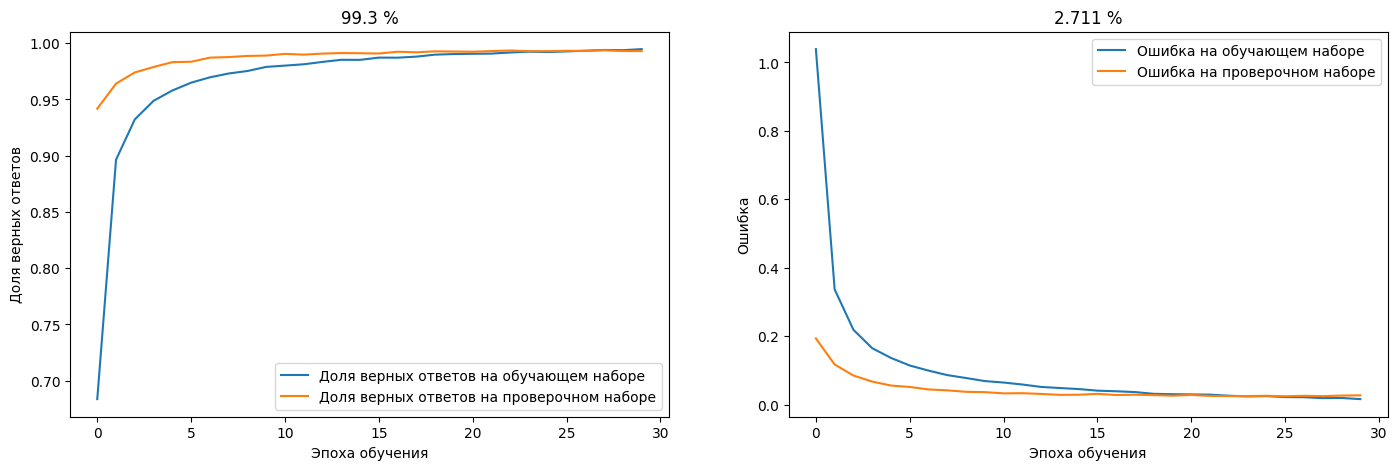


 Start
Epoch 1/35
375/375 [==============================] - 24s 61ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0235 - val_accuracy: 0.9942
Epoch 2/35
375/375 [==============================] - 23s 61ms/step - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0257 - val_accuracy: 0.9937
Epoch 3/35
375/375 [==============================] - 23s 61ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0244 - val_accuracy: 0.9938
Epoch 4/35
375/375 [==============================] - 23s 61ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0255 - val_accuracy: 0.9940
Epoch 5/35
375/375 [==============================] - 23s 61ms/step - loss: 0.0139 - accuracy: 0.9956 - val_loss: 0.0254 - val_accuracy: 0.9935
Epoch 6/35
375/375 [==============================] - 23s 61ms/step - loss: 0.0135 - accuracy: 0.9953 - val_loss: 0.0247 - val_accuracy: 0.9940
Epoch 7/35
375/375 [==============================] - 23s 61ms/step - loss: 0.0129 - accuracy: 0.9956 - val_loss: 0.0271 - val_a

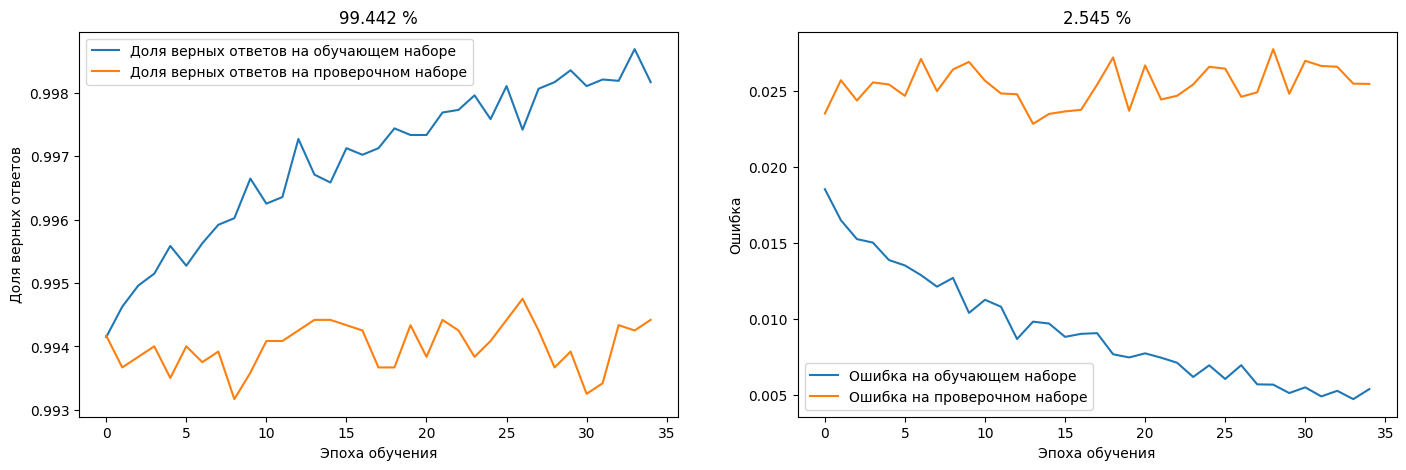


 Start
Epoch 1/40
375/375 [==============================] - 24s 61ms/step - loss: 0.0050 - accuracy: 0.9983 - val_loss: 0.0254 - val_accuracy: 0.9944
Epoch 2/40
375/375 [==============================] - 23s 61ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0276 - val_accuracy: 0.9942
Epoch 3/40
375/375 [==============================] - 23s 61ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0268 - val_accuracy: 0.9942
Epoch 4/40
375/375 [==============================] - 23s 61ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.0257 - val_accuracy: 0.9945
Epoch 5/40
375/375 [==============================] - 23s 61ms/step - loss: 0.0053 - accuracy: 0.9981 - val_loss: 0.0244 - val_accuracy: 0.9946
Epoch 6/40
375/375 [==============================] - 23s 61ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0253 - val_accuracy: 0.9946
Epoch 7/40
375/375 [==============================] - 23s 61ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0251 - val_a

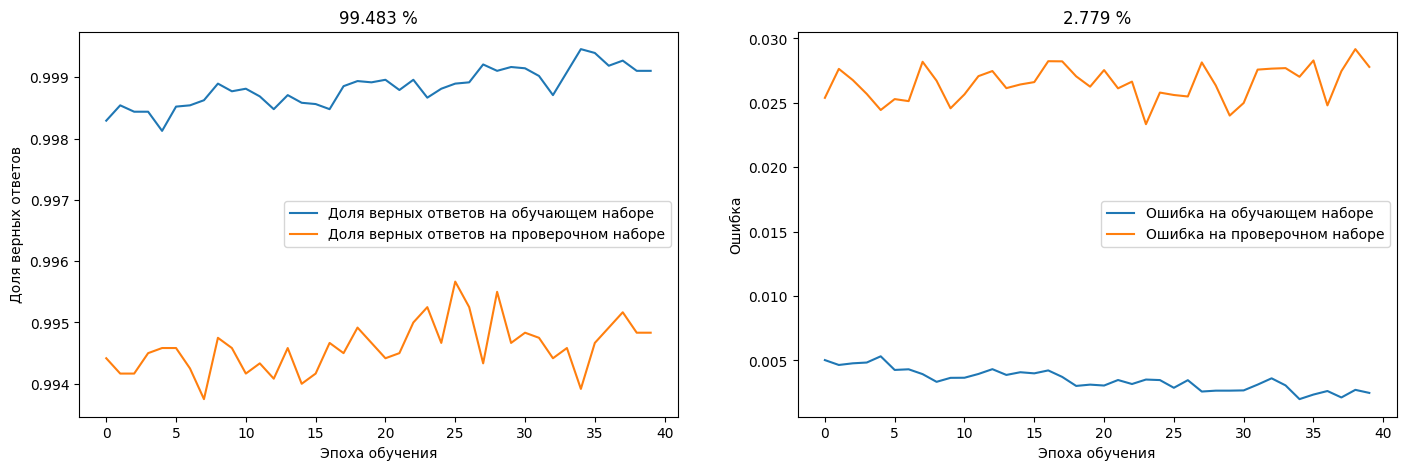


 Start
Epoch 1/45
375/375 [==============================] - 24s 61ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 0.0289 - val_accuracy: 0.9944
Epoch 2/45
375/375 [==============================] - 23s 60ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0289 - val_accuracy: 0.9939
Epoch 3/45
375/375 [==============================] - 23s 61ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0272 - val_accuracy: 0.9947
Epoch 4/45
375/375 [==============================] - 23s 61ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.0310 - val_accuracy: 0.9939
Epoch 5/45
375/375 [==============================] - 23s 61ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0287 - val_accuracy: 0.9945
Epoch 6/45
375/375 [==============================] - 23s 61ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0294 - val_accuracy: 0.9943
Epoch 7/45
375/375 [==============================] - 23s 61ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0291 - val_a

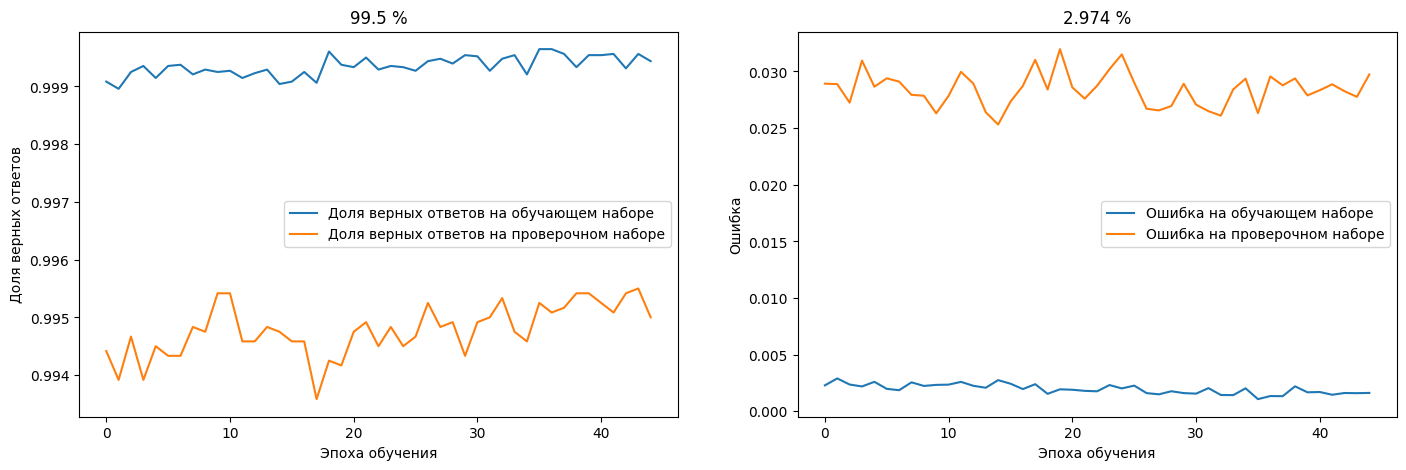


 Start
Epoch 1/50
375/375 [==============================] - 24s 61ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0310 - val_accuracy: 0.9946
Epoch 2/50
375/375 [==============================] - 23s 61ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.0329 - val_accuracy: 0.9951
Epoch 3/50
375/375 [==============================] - 23s 61ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0315 - val_accuracy: 0.9947
Epoch 4/50
375/375 [==============================] - 23s 61ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0321 - val_accuracy: 0.9946
Epoch 5/50
375/375 [==============================] - 23s 61ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 0.0326 - val_accuracy: 0.9948
Epoch 6/50
375/375 [==============================] - 23s 61ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0303 - val_accuracy: 0.9952
Epoch 7/50
375/375 [==============================] - 23s 61ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0304 - val_a

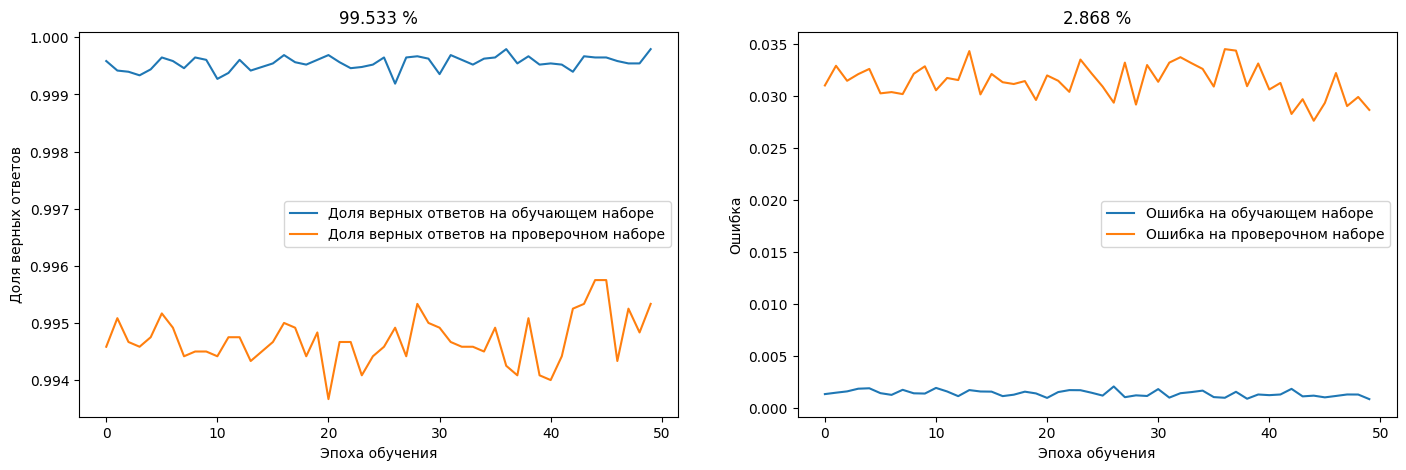

In [39]:
#frame_height()
eph = 25
for i in range(5):
    eph += 5
    send_message('Start')
    model.compile(optimizer=Adam(learning_rate=0.0001), loss=cross_loss, metrics=['accuracy'])
#model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test, y_test), verbose=1)
    model.fit(x_train, y_train, epochs=eph, batch_size=128, validation_split=v_split, verbose=1)
    message = str(model.history.history['val_accuracy'])
    send_message(message)
    plot_history(model.history)

In [24]:
#@title 🔬 Проверка точности классификации на тестовой выборке
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0175 - accuracy: 0.9947


[0.017469657585024834, 0.994700014591217]

In [25]:
!pip install pydot

In [26]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 1.8 MB/s eta 0:00:00


In [27]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 💽 Сохранение удачной модели НС (полностью с историей и весами)

In [23]:
model.save('mnist_best_model_7.h5')

### **⚙️ Подготовка отсканированных новых изображений цифр**

 - нарисовать цифру размером не более 5 * 5 мм (без наклона) и отсканировать
 - с помощью функции image.load_img(path, target_size=(28, 28), color_mode = ‘grayscale’) загрузить картинку в переменную
 - с помощью функции image.img_to_array(img) преобразовать изображение в numpy-массив
 - выполнить инверсию цветов, нормирование и решейп массива: ``


In [30]:
# Загрузка архива с GitHub [?raw=true] и распаковка
!wget -q -O foto.tar.xz https://github.com/dnp34/AI_CNN/blob/main/Data/my_foto.tar.xz?raw=true
!tar -xf foto.tar.xz
!rm -f foto.tar.xz
!ls my_foto/*

my_foto/my_foto_1:
0.jpg  1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg	8.jpg  9.jpg

my_foto/my_foto_2:
0.jpg  1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg	8.jpg  9.jpg

my_foto/my_foto_3:
0.jpg  1.jpg  2.jpg  3.jpg  4.jpg  5.jpg  6.jpg  7.jpg	8.jpg  9.jpg


### 🔬 Загрузка **сохраненной модели** полностью и проверка целостности

In [31]:
from tensorflow.keras.models import load_model
model_file = 'mnist_best_model_7.h5'
model_png = 'mnist_best_model_99-32.png'
model = load_model(model_file)
#print(dir(model))

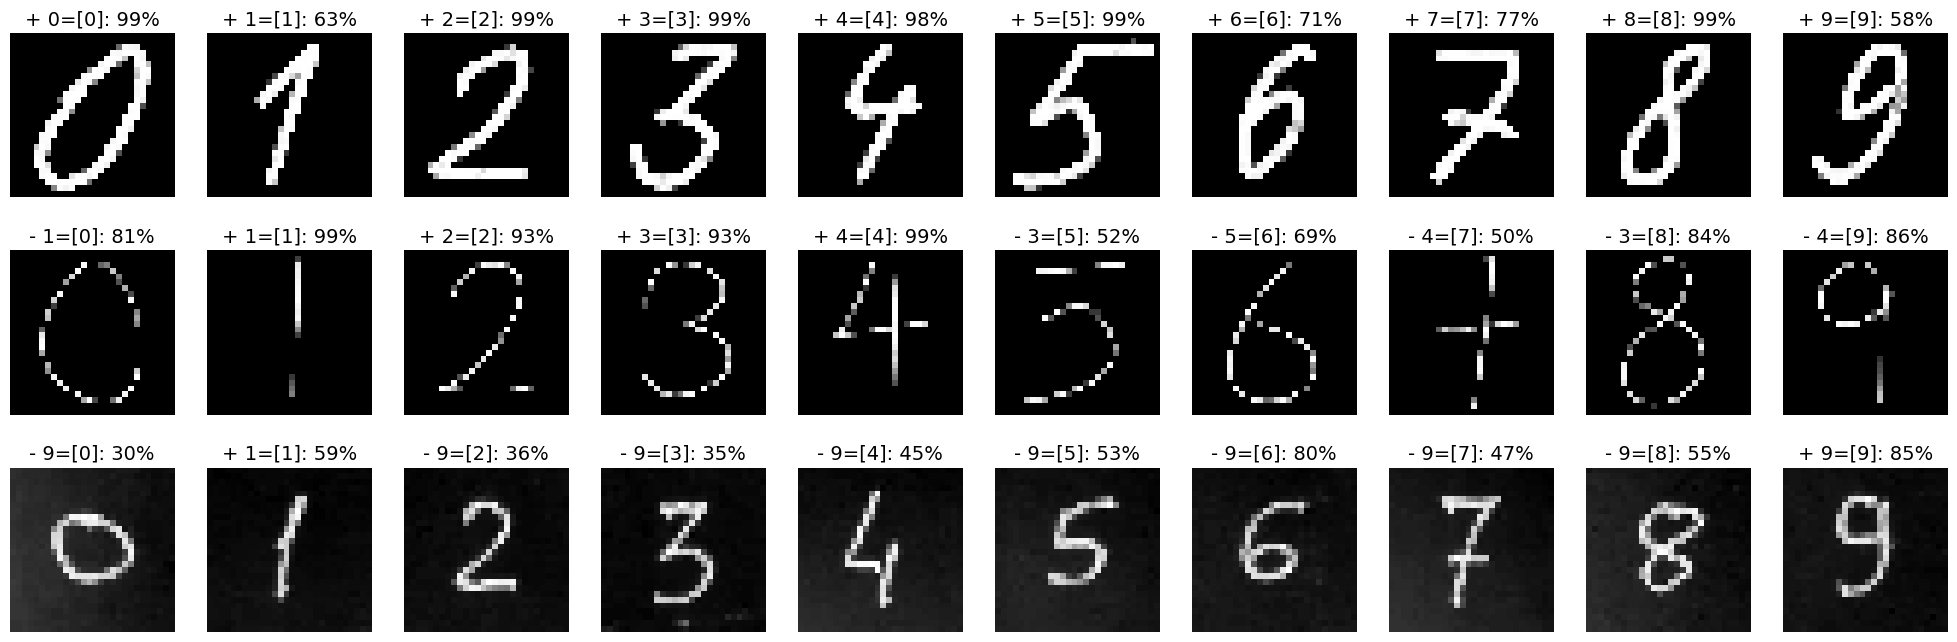

In [33]:
# Распознавание загруженных файлов
col_mode = "grayscale"
pic_box = plt.figure(figsize=(25,8))              # формируем фигуру размером 22 на 10 дюймов
for z in range(0, 3):
  for i in range(0, 10):                          # выбираем 3 ряда случайных индексов для отображения картинок
    pic_box.add_subplot(3, 10, z * 10 + i + 1)    # добавляем ячейку в фигуру pix_box для вывода текущего изображения
    img = load_img('./my_foto/my_foto_' + str(z + 1) + '/' + str(i) + '.jpg', target_size=(img_h, img_w), color_mode=col_mode)
    img = 255 - np.array(img)                     # конвертация цвета (для приведения к виду из базы)
    img[img<50] = 0                               # избавление от шумов
    plt.imshow(img, cmap = 'gray')                # вывод картинок с подписью метки
    plt.axis('off')                               # отключаем отображение осей
    # model.predict(image)
    image = img.reshape(-1, 28, 28, 1)
    pred = model.predict(image, verbose=False)
    digit = np.argmax(pred)
    accur = int(100 * pred[0][digit])
    test = (lambda x: '+' if x == i else '-')(digit)
    plt.title(f'{test} {str(digit)}=[{str(i)}]: {str(accur)}%', fontsize=14)    # вывод метки класса для N-го изображения

plt.show()                                        # выводим все созданные фигуры на экран

## Подготовка скриптов и файлов для загрузки модели на демо-панели

In [ ]:
#@title Подготовка работающего срипта
from tensorflow.keras.models import load_model
import numpy as np
my_classes = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}

def img_predict(img_path='./my_foto/my_foto_1/0.jpg', model_path='./mnist_best_model_7.h5'):
    if len(img_path) < 7:
      img_path = './my_foto/my_foto_1/' + img_path
    col_mode = 'grayscale'
    img_h, img_w = 28, 28
    img_key = my_classes[int(img_path[-5:-4])]

    model = load_model(model_path)
    img = load_img(img_path, target_size=(img_h, img_w), color_mode=col_mode)
    img = 255 - np.array(img)
    img[img<50] = 0
    image = img.reshape(-1, 28, 28, 1)
    pred = model.predict(image, verbose=False)
    digit = np.argmax(pred)
    accur = str(int(100 * pred[0][digit]))
    test = (lambda x: '✅' if str(x) == img_key else '⛔️')(digit)
    img_test = f'{test} {str(digit)}=[{img_key}]: {accur}%'
    print(img_test)


In [ ]:
# Проверка всех файлов папки
for i in range(10):
    img_predict(str(i) + '.jpg')

✅ 0=[0]: 99%
⛔️ 7=[1]: 61%
✅ 2=[2]: 99%
✅ 3=[3]: 99%
✅ 4=[4]: 99%
✅ 5=[5]: 99%
✅ 6=[6]: 98%
✅ 7=[7]: 81%
✅ 8=[8]: 99%
✅ 9=[9]: 88%


In [ ]:
#@title Функция predict (для сервера демо-панели!!) + [img_path][model_path]
# Запись готового скрипта в переменную -> и в файл .py
text_python = '''
from tensorflow.keras.models import load_model
import numpy as np
my_classes = {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}

def predict(img_path='./my_foto/my_foto_1/0.jpg', model_path='./mnist_best_model_7.h5'):
    if len(img_path) < 7:
      img_path = './my_foto/my_foto_1/' + img_path
    col_mode = 'grayscale'
    img_h, img_w = 28, 28
    img_key = my_classes[int(img_path[-5:-4])]

    model = load_model(model_path)
    img = load_img(img_path, target_size=(img_h, img_w), color_mode=col_mode)
    img = 255 - np.array(img)
    img[img<50] = 0
    image = img.reshape(-1, 28, 28, 1)
    pred = model.predict(image, verbose=False)
    digit = np.argmax(pred)
    accur = str(int(100 * pred[0][digit]))
    test = (lambda x: '✅' if str(x) == img_key else '⛔️')(digit)
    img_test = f'{test} {str(digit)}=[{img_key}]: {accur}%'
    print(img_test)
'''

my_script = 'img_predict.py'
with open(my_script, 'w') as file:
    file.write(text_python)

In [ ]:
# Библиотеки для работы с файлами и zip-архивами
from zipfile import ZipFile as Zip
from google.colab import files
from shutil import copyfile
import os

project_files = [model_file, model_png, my_script, *[f'{i}.jpg' for i in range(10)]]

local_dir = '/content/'
foto_path = local_dir + 'my_foto/my_foto_1/'
for i in range(10):
    copyfile(foto_path + str(i) + '.jpg', local_dir + str(i) + '.jpg')

print(project_files)

!ls -l

['mnist_best_model_7.h5', 'mnist_best_model_99-32.png', 'img_predict.py', '0.jpg', '1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']
total 21520
-rw-r--r-- 1 root root     4150 Feb  3 22:34 0.jpg
-rw-r--r-- 1 root root     2799 Feb  3 22:34 1.jpg
-rw-r--r-- 1 root root     3513 Feb  3 22:34 2.jpg
-rw-r--r-- 1 root root     3789 Feb  3 22:34 3.jpg
-rw-r--r-- 1 root root     3021 Feb  3 22:34 4.jpg
-rw-r--r-- 1 root root     3723 Feb  3 22:34 5.jpg
-rw-r--r-- 1 root root     3580 Feb  3 22:34 6.jpg
-rw-r--r-- 1 root root     3301 Feb  3 22:34 7.jpg
-rw-r--r-- 1 root root     3522 Feb  3 22:34 8.jpg
-rw-r--r-- 1 root root     3815 Feb  3 22:34 9.jpg
-rw-r--r-- 1 root root       95 Feb  3 18:35 env.json
-rw-r--r-- 1 root root      904 Feb  3 22:29 img_predict.py
-rw-r--r-- 1 root root 21818328 Feb  3 21:03 mnist_best_model_7.h5
-rw-r--r-- 1 root root   152795 Feb  3 20:48 mnist_best_model_99-32.png
drwxr-xr-x 5 1000 1001     4096 Jan 22 17:01 my_foto
drwxr-xr

In [ ]:
#@title 💽 Формирование zip-архива для загрузки модели на демо-панели

project_zip = 'project.zip'
zipArchive = Zip(local_dir + project_zip, 'w')

for file in project_files:
    if os.path.exists(file):
        zipArchive.write(file)
    else:
        print(f'\n📍 Файл {file} отсутствует!')
zipArchive.close()

!ls -l *.zip

files.download(filename=project_zip)

print(f'\n♻️ zip-архив проекта [{project_zip}] загружается на ПК:')

-rw-r--r-- 1 root root 22008472 Feb  3 22:44 project.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


♻️ zip-архив проекта [project.zip] загружается на ПК:


[**💠 Загрузить архив на демо-панель**](https://srv1.demo.neural-university.ru/autodeploy.html)

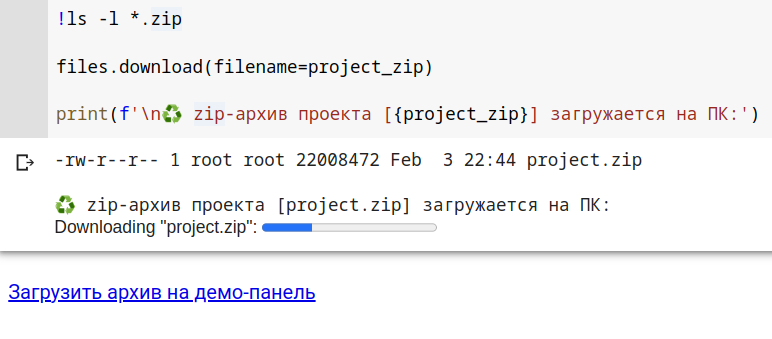